

# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [0]:
import tensorflow as tf
from scipy.io import loadmat

# My imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [636]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Load the dataset from your Drive folder

train = loadmat('/content/gdrive/My Drive/train_32x32.mat')
test = loadmat('/content/gdrive/My Drive/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [0]:
# Extraction of training and testing data
train_data = train['X']
train_targets = train['y']
test_data = test['X']
test_targets = test['y']

In [639]:
# Checking shapes of data and target arrays
print(f'The shape of training data is as follows: {train_data.shape}.')
print(f'The shape of training targets is as follows: {train_targets.shape}.')
print(f'The shape of testing data is as follows: {test_data.shape}.')
print(f'The shape of testing targets is as follows: {test_targets.shape}.')

The shape of training data is as follows: (32, 32, 3, 73257).
The shape of training targets is as follows: (73257, 1).
The shape of testing data is as follows: (32, 32, 3, 26032).
The shape of testing targets is as follows: (26032, 1).


In [0]:
# Changing dimensions of the data and target arrays (in order to get batch size as the first dimension)
train_data = np.moveaxis(train_data, -1, 0)
test_data = np.moveaxis(test_data, -1, 0)

In [641]:
# Checking shapes of new data and target arrays
print(f'The shape of training data is as follows: {train_data.shape}.')
print(f'The shape of training targets is as follows: {train_targets.shape}.')
print(f'The shape of testing data is as follows: {test_data.shape}.')
print(f'The shape of testing targets is as follows: {test_targets.shape}.')

The shape of training data is as follows: (73257, 32, 32, 3).
The shape of training targets is as follows: (73257, 1).
The shape of testing data is as follows: (26032, 32, 32, 3).
The shape of testing targets is as follows: (26032, 1).


In [0]:
# Converting training and testing targets to one hot encoded vectors
train_targets_one_hot = []
test_targets_one_hot = []

for i in train_targets:
  temp = np.zeros(10)
  temp[i-1] = 1
  train_targets_one_hot.append(temp)

for i in test_targets:
  temp = np.zeros(10)
  temp[i-1] = 1
  test_targets_one_hot.append(temp)

train_targets_one_hot = np.array(train_targets_one_hot)
test_targets_one_hot = np.array(test_targets_one_hot)

In [643]:
# Shapes of the one_hot_encoded vectors
print(train_targets_one_hot.shape)
print(test_targets_one_hot.shape)

(73257, 10)
(26032, 10)


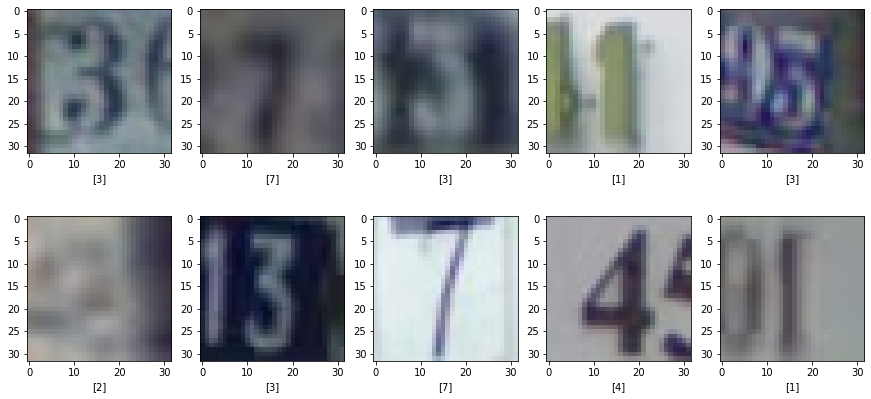

In [644]:
# Creating a random sample of 10 RGB images
h = 32
w = 32
fig=plt.figure(figsize=(15,7))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    random_index = np.random.randint(0, train_data.shape[0])
    img = train_data[random_index,: , :, :]
    fig.add_subplot(rows, columns, i)
    label_for_img = train_targets[random_index, :]
    plt.xlabel(f"{label_for_img}")
    plt.imshow(img)
plt.show()

In [0]:
# Converting images to greyscale
train_data_grayscale = tf.reduce_mean(train_data, axis = -1, keepdims = True)
test_data_grayscale = tf.reduce_mean(test_data, axis = -1, keepdims = True)

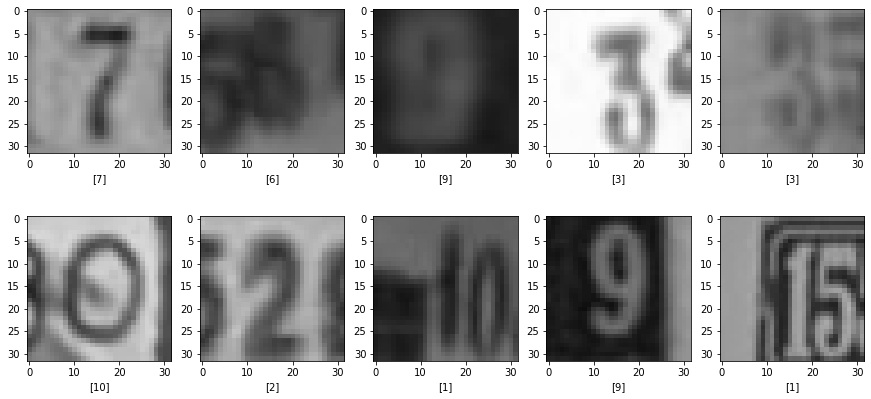

In [646]:
# Creating a random sample of 10 greyscale images
train_data_for_plotting = tf.reduce_mean(train_data, axis = -1, keepdims = False)

h = 32
w = 32
fig=plt.figure(figsize=(15,7))
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    random_index = np.random.randint(0, train_data_for_plotting.shape[0])
    img = train_data_for_plotting[random_index, :, :]
    fig.add_subplot(rows, columns, i)
    random_label = train_targets[random_index, :]
    plt.xlabel(f"{random_label}")
    plt.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [0]:
# Building the model
model = Sequential([
                    Flatten(input_shape = (32, 32, 1)),
                    Dense(512, activation = 'relu'),
                    Dense(512, activation = 'relu'),
                    Dense(256, activation = 'relu'),
                    Dense(10, activation = 'softmax')

])

In [648]:
# Summary of the model
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_97 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_98 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_99 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_100 (Dense)            (None, 10)                2570      
Total params: 921,354
Trainable params: 921,354
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model
cat_acc = tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy', dtype=None)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [cat_acc])

In [0]:
# Incorporating callbacks
# Early stopping callback
best_epoch_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='auto')

# Model checkpoint callback
filepath_checkpoint = '/content/gdrive/My Drive/Model_checkpoint_MLP'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath_checkpoint, monitor = 'val_loss', save_best_only = True, save_weights_only = True, mode = 'auto')

In [651]:
# Training the model
history = model.fit(x = train_data_grayscale, y = train_targets_one_hot, batch_size = 512, epochs = 30, verbose = 1, validation_split = 0.15, callbacks = [best_epoch_callback, model_checkpoint_callback])

Epoch 1/30
122/122 [==============================] - 5s 41ms/step - loss: 40.7715 - categorical_accuracy: 0.1236 - val_loss: 2.6397 - val_categorical_accuracy: 0.1604
Epoch 2/30
122/122 [==============================] - 5s 40ms/step - loss: 2.4904 - categorical_accuracy: 0.1958 - val_loss: 2.4401 - val_categorical_accuracy: 0.1989
Epoch 3/30
122/122 [==============================] - 5s 41ms/step - loss: 2.0968 - categorical_accuracy: 0.3047 - val_loss: 2.0686 - val_categorical_accuracy: 0.3297
Epoch 4/30
122/122 [==============================] - 5s 41ms/step - loss: 1.7978 - categorical_accuracy: 0.4064 - val_loss: 1.7030 - val_categorical_accuracy: 0.4561
Epoch 5/30
122/122 [==============================] - 5s 40ms/step - loss: 1.5563 - categorical_accuracy: 0.4925 - val_loss: 1.4845 - val_categorical_accuracy: 0.5279
Epoch 6/30
122/122 [==============================] - 5s 40ms/step - loss: 1.3946 - categorical_accuracy: 0.5566 - val_loss: 1.3423 - val_categorical_accuracy: 0.58

[Text(0, 0.5, 'Validation accuracy'), Text(0.5, 0, 'Epochs')]

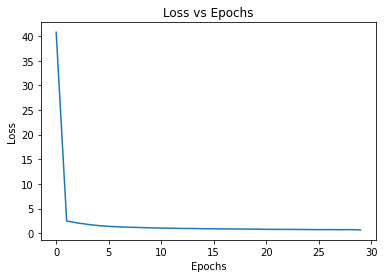

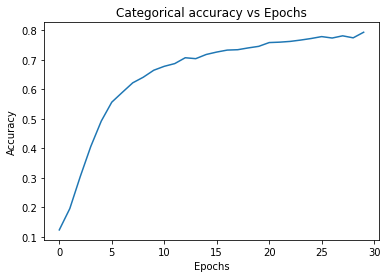

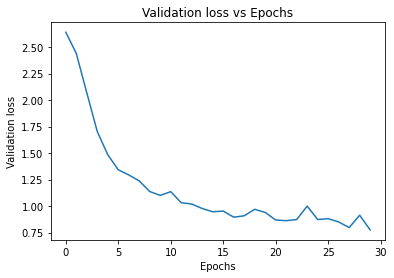

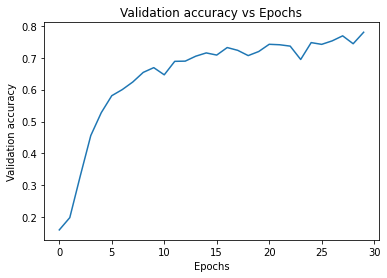

In [652]:
# Plotting required curves
df = pd.DataFrame(history.history)

# Training set loss plot
loss_plot = df.plot(y = 'loss', title = 'Loss vs Epochs', legend = False)
loss_plot.set(xlabel = 'Epochs', ylabel = 'Loss')

# Training set accuracy plot
accuracy_plot = df.plot(y = 'categorical_accuracy', title = 'Categorical accuracy vs Epochs', legend = False)
accuracy_plot.set(xlabel = 'Epochs', ylabel = 'Accuracy')

# Validation set loss plot
val_loss_plot = df.plot(y = 'val_loss', title = 'Validation loss vs Epochs', legend = False)
val_loss_plot.set(xlabel = 'Epochs', ylabel = 'Validation loss')

# Validation set accuracy plot
val_acc_plot = df.plot(y = 'val_categorical_accuracy', title = 'Validation accuracy vs Epochs', legend = False)
val_acc_plot.set(xlabel = 'Epochs', ylabel = 'Validation accuracy')


In [653]:
# Evaluation of model on training set
results = model.evaluate(test_data_grayscale, test_targets_one_hot, batch_size = 32, verbose = 1)

814/814 [==============================] - 2s 3ms/step - loss: 0.9413 - categorical_accuracy: 0.7533


In [654]:
print(f"Loss on the test set is as follows: {results[0]}")
print(f"Accuracy on the test set is as follows: {results[1]}")

Loss on the test set is as follows: 0.9413092136383057
Accuracy on the test set is as follows: 0.7532652020454407


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [0]:
# Building the model
model = Sequential([
                        Conv2D(16, (3,3), padding = 'valid', activation = 'relu', input_shape = train_data[0].shape),
                        MaxPool2D(pool_size = (3,3)),
                        Conv2D(32, (3,3), padding = 'valid', activation = 'relu'),
                        MaxPool2D(pool_size = (3,3)),
                        Flatten(),
                        Dense(64, activation = 'relu'),
                        Dense(64, activation = 'relu'),
                        Dense(10, activation = 'softmax')
                        ])

In [656]:
# Summary of the model
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_101 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_102 (Dense)            (None, 64)              

In [0]:
# Compiling the model
cat_acc = tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy', dtype=None)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [cat_acc])

In [0]:
# Incorporating callbacks
# Early stopping callback
best_epoch_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='auto')

# Model checkpoint callback
filepath_checkpoint = '/content/gdrive/My Drive/Model_checkpoint_CNN'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath_checkpoint, monitor = 'val_loss', save_best_only = True, save_weights_only = True, mode = 'auto')

In [659]:
# Training the model
history = model.fit(x = train_data, y = train_targets_one_hot, batch_size = 512, epochs = 30, verbose = 1, validation_split = 0.15, callbacks = [best_epoch_callback, model_checkpoint_callback])

Epoch 1/30
122/122 [==============================] - 27s 224ms/step - loss: 2.6756 - categorical_accuracy: 0.2469 - val_loss: 1.8396 - val_categorical_accuracy: 0.3764
Epoch 2/30
122/122 [==============================] - 27s 225ms/step - loss: 1.4777 - categorical_accuracy: 0.5064 - val_loss: 1.2007 - val_categorical_accuracy: 0.6092
Epoch 3/30
122/122 [==============================] - 28s 228ms/step - loss: 1.0887 - categorical_accuracy: 0.6540 - val_loss: 1.0408 - val_categorical_accuracy: 0.6691
Epoch 4/30
122/122 [==============================] - 28s 228ms/step - loss: 0.9462 - categorical_accuracy: 0.7043 - val_loss: 0.9123 - val_categorical_accuracy: 0.7199
Epoch 5/30
122/122 [==============================] - 31s 255ms/step - loss: 0.8521 - categorical_accuracy: 0.7373 - val_loss: 0.8396 - val_categorical_accuracy: 0.7408
Epoch 6/30
122/122 [==============================] - 28s 228ms/step - loss: 0.7983 - categorical_accuracy: 0.7558 - val_loss: 0.8059 - val_categorical_acc

[Text(0, 0.5, 'Validation accuracy'), Text(0.5, 0, 'Epochs')]

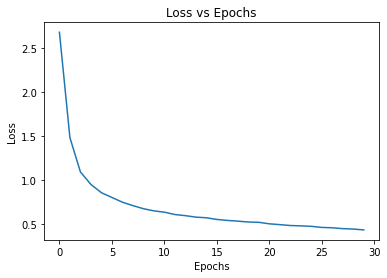

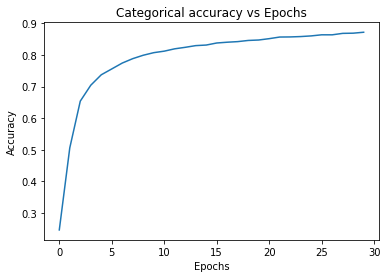

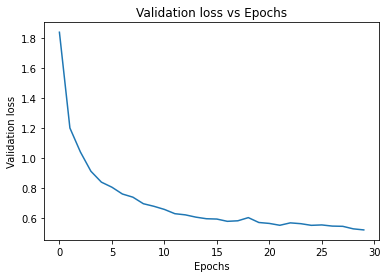

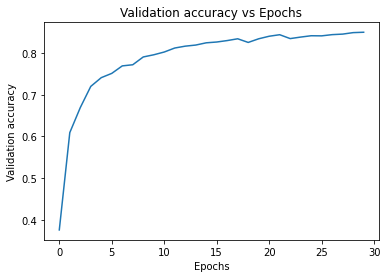

In [660]:
# Plotting required curves
df = pd.DataFrame(history.history)

# Training set loss plot
loss_plot = df.plot(y = 'loss', title = 'Loss vs Epochs', legend = False)
loss_plot.set(xlabel = 'Epochs', ylabel = 'Loss')

# Training set accuracy plot
accuracy_plot = df.plot(y = 'categorical_accuracy', title = 'Categorical accuracy vs Epochs', legend = False)
accuracy_plot.set(xlabel = 'Epochs', ylabel = 'Accuracy')

# Validation set loss plot
val_loss_plot = df.plot(y = 'val_loss', title = 'Validation loss vs Epochs', legend = False)
val_loss_plot.set(xlabel = 'Epochs', ylabel = 'Validation loss')

# Validation set accuracy plot
val_acc_plot = df.plot(y = 'val_categorical_accuracy', title = 'Validation accuracy vs Epochs', legend = False)
val_acc_plot.set(xlabel = 'Epochs', ylabel = 'Validation accuracy')

In [662]:
# Evaluation of model on training set
results = model.evaluate(test_data, test_targets_one_hot, batch_size = 32, verbose = 1)

814/814 [==============================] - 7s 9ms/step - loss: 0.5730 - categorical_accuracy: 0.8452


In [663]:
print(f"Loss on the test set is as follows: {results[0]}")
print(f"Accuracy on the test set is as follows: {results[1]}")

Loss on the test set is as follows: 0.5730292797088623
Accuracy on the test set is as follows: 0.8452289700508118


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [0]:
# Build a new MLP
new_model_MLP = Sequential([
                    Flatten(input_shape = (32, 32, 1)),
                    Dense(512, activation = 'relu'),
                    Dense(512, activation = 'relu'),
                    Dense(256, activation = 'relu'),
                    Dense(10, activation = 'softmax')

])

In [665]:
# Loading best weights from Model Checkpoint for the new randomly intialized MLP
new_model_MLP.load_weights('/content/gdrive/My Drive/Model_checkpoint_MLP')

In [0]:
# Build a new CNN
new_model_CNN = Sequential([
                        Conv2D(16, (3,3), padding = 'valid', activation = 'relu', input_shape = train_data[0].shape),
                        MaxPool2D(pool_size = (3,3)),
                        Conv2D(32, (3,3), padding = 'valid', activation = 'relu'),
                        MaxPool2D(pool_size = (3,3)),
                        Flatten(),
                        Dense(64, activation = 'relu'),
                        Dense(64, activation = 'relu'),
                        Dense(10, activation = 'softmax')
                        ])

In [667]:
# Loading best weights from Model Checkpoint for the new randomly intialized CNN
new_model_CNN.load_weights('/content/gdrive/My Drive/Model_checkpoint_CNN')

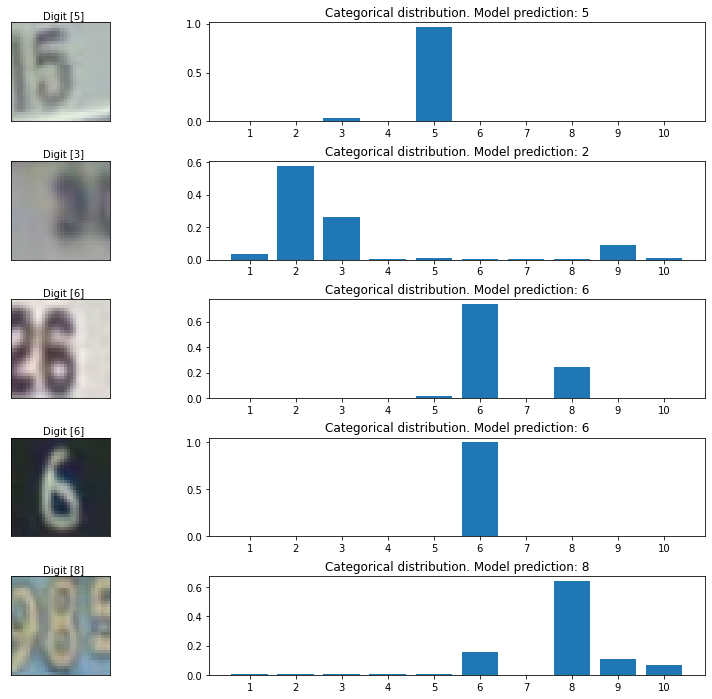

In [688]:
# Plotting 5 random images and their respective plots
num_test_images = test_data.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = test_data[random_inx, ...]
random_test_labels = test_targets[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.linspace(1.0, 10.0, num=10), prediction)
    axes[i, 1].set_xticks(np.linspace(1.0, 10.0, num=10))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)+1}")
    
plt.show()